<a href="https://colab.research.google.com/github/Mangeshdeore/Diamond-Price-Prediction/blob/main/Diamond_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/diamonds2.csv')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data.shape

(53940, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


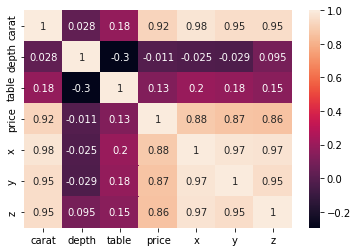

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# Feature Engineering
data['Symmetry']= data['x']/data['y']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Symmetry
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [ ]:
data=data.dropna(axis=0)
data_new= pd.get_dummies(data)
X=data_new.drop(['price','x','y','z'], axis=1)
y=data_new['price']
features=X.columns

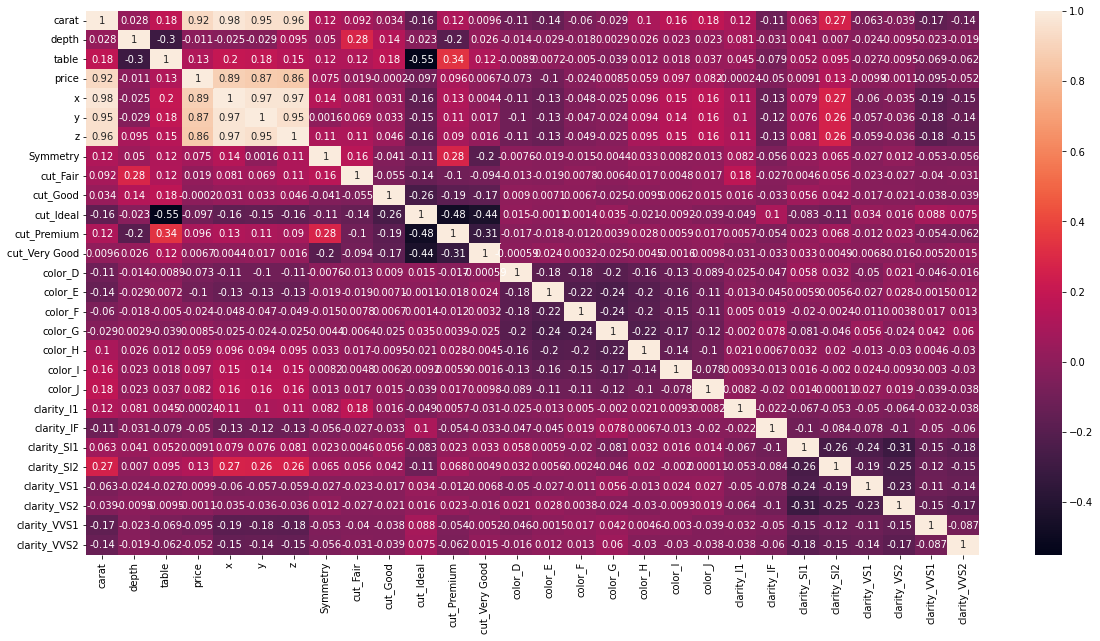

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data_new.corr(), annot=True)

In [ ]:
#Scale the data
scaler=StandardScaler()
print(scaler.fit_transform(X))

[[-1.19812283 -0.17405623 -1.0998064  ... -0.5422832  -0.26958204
  -0.32197693]
 [-1.24031884 -1.36080279  1.5859211  ... -0.5422832  -0.26958204
  -0.32197693]
 [-1.19812283 -3.38525281  3.37640611 ... -0.5422832  -0.26958204
  -0.32197693]
 ...
 [-0.20651658  0.73345584  1.13829985 ... -0.5422832  -0.26958204
  -0.32197693]
 [ 0.1310515  -0.52309934  0.24305735 ... -0.5422832  -0.26958204
  -0.32197693]
 [-0.10102656  0.31460412 -1.0998064  ... -0.5422832  -0.26958204
  -0.32197693]]


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y)

## **Prdiction and Evaluate the Model Performance**

In [ ]:
model_eval=pd.DataFrame(index=['Null','KNN','MLR'], columns=['RMSE'])

In [ ]:
y_pred_null= y_train.mean()

## **K-Neighbours Regressor**

In [ ]:
knn= KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
y_pred= knn.predict(X_test)

## **Random Forest Regressor**

In [ ]:
rf= RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred2= y_pred= rf.predict(X_test)

## **Linear Regressor**

In [ ]:
lin= LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred3= lin.predict(X_test)

## **Lasso Regression**

In [ ]:
lasso= Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [ ]:
y_pred4= lasso.predict(X_test)

In [ ]:
model_eval=pd.DataFrame(index=['KNN','MLR'], columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['Lasso','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['Null','RMSE']=y_pred_null
model_eval

,RMSE
KNN,548.251996
MLR,1150.921698
RF,548.251996
Lasso,1151.060015
Null,3940.108062


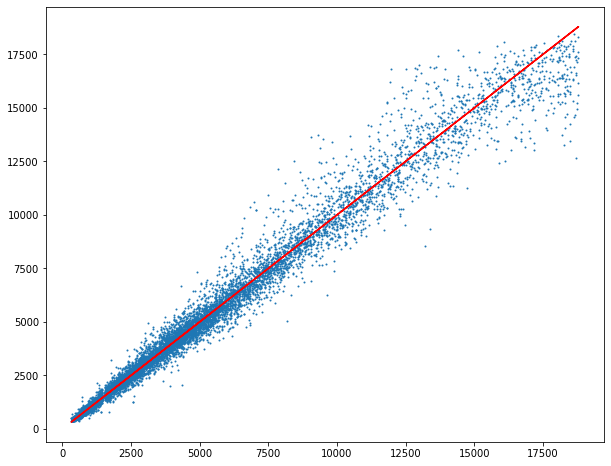

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
ax.scatter(y_test,y_pred,s=1)
ax.plot(y_test, y_test, color='red')

In [ ]:
data.to_csv("Diamond_New.csv")